In [1]:
from PIL import Image
from matplotlib.pyplot import imshow
import os
import pandas as pd

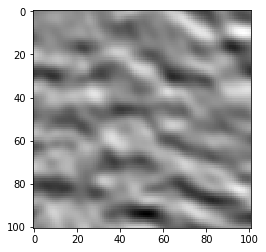

In [2]:
test_image = "data/train/images/000e218f21.png"
original = Image.open(test_image)
imshow(original)

width, height = original.size   # Get dimensions
left = 0
top = 0
right = width / 2
bottom = height / 2
cropped_leftUpper = original.crop((left, top, right, bottom))
cropped_leftBottom = original.crop((0, height / 2, right, height))
cropped_rightUpper = original.crop((width / 2, top, width, bottom))
cropped_rightBottom = original.crop((width / 2, height / 2, width, height))

In [3]:
fnames = pd.read_csv('data/train.csv', usecols=['id'])

In [4]:
def save_cropped_image():
    if not os.path.exists('data_aug/train_crop/images/'):
        os.makedirs('data_aug/train_crop/images/')
    if not os.path.exists('data_aug/train_crop/masks/'):
        os.makedirs('data_aug/train_crop/masks/')
    for fname in fnames.id:
        img = Image.open(f'data/train/images/{fname}.png')
        mask = Image.open(f'data/train/masks/{fname}.png')
        width, height = img.size
        left = 0
        top = 0
        right = width / 2
        bottom = height / 2
        
        cropped_leftUpperImg = img.crop((left, top, right, bottom))
        cropped_leftBottomImg = img.crop((0, height / 2, right, height))
        cropped_rightUpperImg = img.crop((width / 2, top, width, bottom))
        cropped_rightBottomImg = img.crop((width / 2, height / 2, width, height))
        
        cropped_leftUpperMask = mask.crop((left, top, right, bottom))
        cropped_leftBottomMask = mask.crop((0, height / 2, right, height))
        cropped_rightUpperMask = mask.crop((width / 2, top, width, bottom))
        cropped_rightBottomMask = mask.crop((width / 2, height / 2, width, height))

        cropped_leftUpperImg.save(f'data_aug/train_crop/images/{fname}-leftUpper.png')
        cropped_leftBottomImg.save(f'data_aug/train_crop/images/{fname}-leftBottom.png')
        cropped_rightUpperImg.save(f'data_aug/train_crop/images/{fname}-rightUpper.png')
        cropped_rightBottomImg.save(f'data_aug/train_crop/images/{fname}-rightBottom.png')

        cropped_leftUpperMask.save(f'data_aug/train_crop/masks/{fname}-leftUpper.png')
        cropped_leftBottomMask.save(f'data_aug/train_crop/masks/{fname}-leftBottom.png')
        cropped_rightUpperMask.save(f'data_aug/train_crop/masks/{fname}-rightUpper.png')
        cropped_rightBottomMask.save(f'data_aug/train_crop/masks/{fname}-rightBottom.png')

In [5]:
save_cropped_image()